<a href="https://colab.research.google.com/github/Sidnasciment0/coleta-analise-dados-dp-m1/blob/main/desafio_m1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Desafio - Módulo 01

## 🔎 Case - Processamento Big Data

Uma operadora de seguro de saúde identificou na sua base de dados de clientes, a **relação entre os dados de colesterol e peso** com a incidência de problemas que influenciam no desenvolvimento de doenças cardíacas. Pensando no bem-estar dos seus clientes, e ao mesmo tempo pensando em diminuir problemas de internação e tratamento para esses tipos de causa, a operadora quer **realizar um estudo para identificar o perfil de pessoas que se encaixam nos grupos de risco** e assim realizar medidas preventivas e palestras de cuidados médicos.

Para isso, a operadora conta com a equipe de arquiteto de **Big Data** para ajuda-los a encontrar o grupo de risco dentre essas pessoas. Através da análise dos dados, os analistas da operadora de seguro de saúde identificaram 3 grandes grupos:

1. Alto risco: Peso e colesterol altos
2. Baixo risco: Peso e colesterol baixos
3. Moderado risco: Peso e colesterol medianos

## 📋 Etapas do Processamento do Big Data
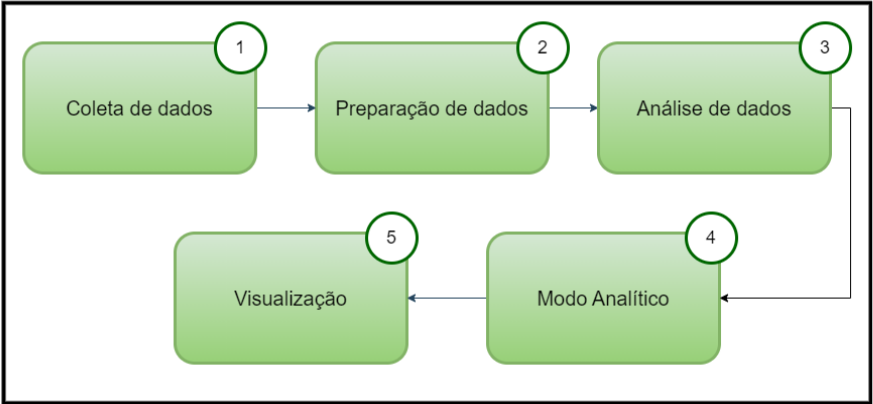

### Coleta dos Dados
 Nesta etapa, são definidas as fontes a resem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameworks e muits outras fontes.

 Nesse projeto, iremos coletar dados já estruturados de dois arquivos. Um arquivo Excel no formato XLXS, e outro no formato CSV.

In [1]:
# Coletando dados de estados brasileiros   
import pandas as pd # Biblioteca de leitura e tratamento de Dataframes

# Lendo arquivo
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding='latin1')

In [2]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [3]:
 # Coletando dados dos clientes
clientes = pd.read_excel('dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [4]:
 # Coletando dados das idades dos clientes
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding='latin1')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


###  Preparação dos Dados

É a etapa minuciosa onde os dados são "limpos" e se tornam aptos para análise. Esse etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas. Essas informações, se não tratadas, acabam prejudicando, o processo como um todo, já que a análise poderá ser comprometida caso os dados não sejam verdadeiros.

In [5]:
# Avaliando as variáveis da base de dados 
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [6]:
# Avaliando as variáveis da base de dados
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [7]:
# Avaliando as variáveis da base de dados
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [8]:
# Avaliando as variáveis da base de dados
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [9]:
# Avaliando as variáveis da base de dados
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


### Analisando Dados ausentes

Verificando valores ausentes/nulos na base

In [10]:
 estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [11]:
 clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [12]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [13]:
# Verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()] # Dentro da Dataframes, localizar (loc) na coluna peso quais são os valores nulos (isnull)

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


Identificamos 5 valores ausentes na base de dados de clientes. Para esse caso, temos 3 opções para tratamento de dados númericos.

1. Eliminação dos registros;
2. Média dos pesos dos clientes: Realizar a média dos pesos; *Obs: A média é fortemente influenciada pelo presença de valores extremos
3. Mediana dos pesos dos clientes. Realiza a mediana dos pesos (Mediana que pega o valor central dos dados)

### Eliminando Dados ausentes

In [14]:
# Dados ausentes
clientes.dropna(subset=['peso'], inplace=True) # Para eliminar o registro. Inplace = True - Significa que quer alterar os dados daquele Dataframe

In [15]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [16]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

In [17]:
estados.loc[estados['pais'].isnull()]

,id_estado,estado,sigla_estado,pais
17,18,Piauí,pi,NaN
23,24,Santa Catarina,sc,NaN


In [18]:
estados.dropna(subset=['pais'], inplace=True)

In [19]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [20]:
estados.count()

id_estado       25
estado          25
sigla_estado    25
pais            25
dtype: int64

In [21]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,542.000000,542.000000,542.000000,542.000000
mean,275.190037,143.440959,170.280443,13.800738
std,158.194932,30.836868,39.185218,7.604659
min,1.000000,95.000000,102.000000,1.000000
25%,138.250000,116.000000,136.000000,7.000000
50%,276.500000,140.000000,169.000000,13.000000
75%,411.750000,171.000000,207.750000,20.000000
max,547.000000,203.000000,235.000000,27.000000


Alterando os Dados por outras medidas

In [22]:
# Realizando a média e mediana da variável colesterol
media = clientes.colesterol.mean()
mediana = clientes.colesterol.median()

In [23]:
# Verificando valores
print(f'O valor da média dos pesoas é: {media}\nO valor da mediana é {mediana}')

O valor da média dos pesoas é: 170.28044280442805
O valor da mediana é 169.0


In [24]:
 # Fazendo arrendodamento da variável média
 round(media, 2)

170.28

In [25]:
# Preencher valores ausentes pela média
clientes.peso.fillna(round(media,2), inplace=True)

In [26]:
 # Verifica se existe algum valor ausente
 clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [27]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

### Substituindo variável categórica

Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente entre variável mais frequnte encontrada no conjuntos de dados

In [28]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [29]:
estados.pais.fillna('Brasil', inplace=True)

In [30]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

### Analisando distrubuição dos Dados

In [31]:
import matplotlib.pyplot as plt

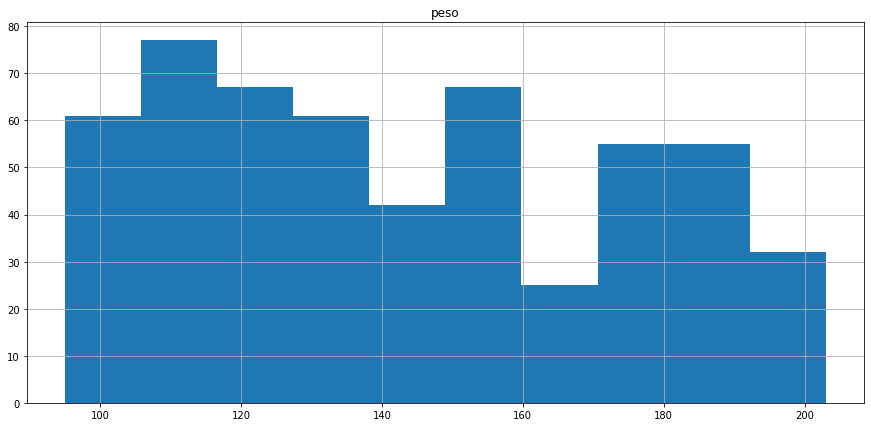

In [32]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

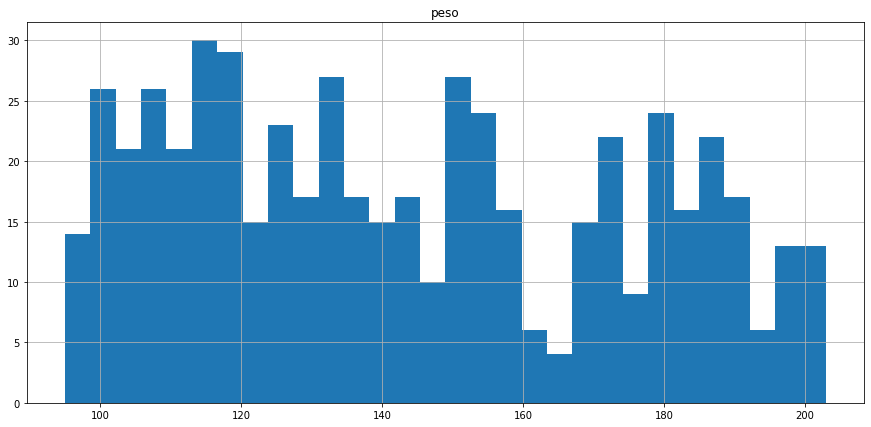

In [33]:
clientes.hist(column='peso', figsize=(15,7), bins=30)
plt.show()

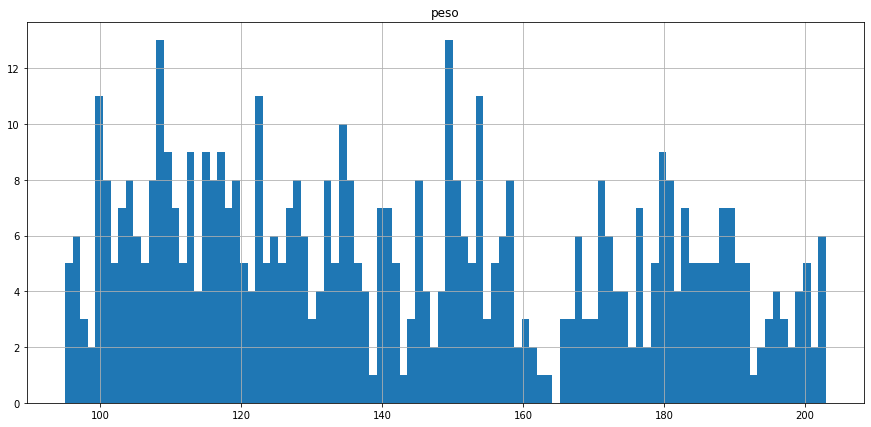

In [34]:
clientes.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

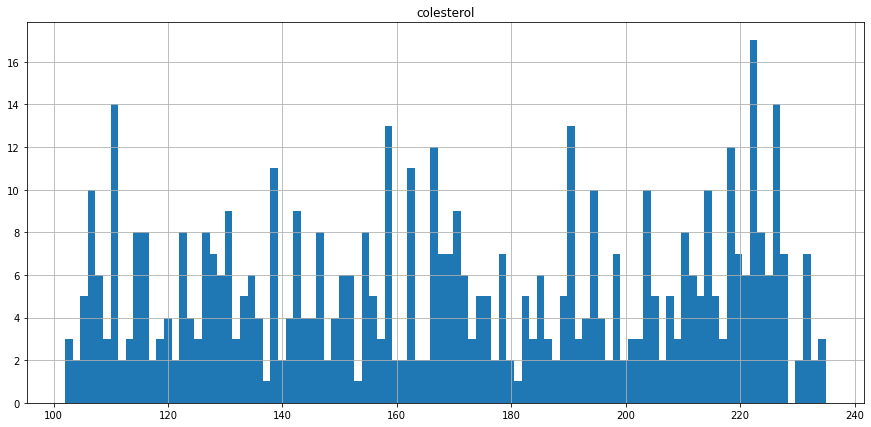

In [35]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)
plt.show()

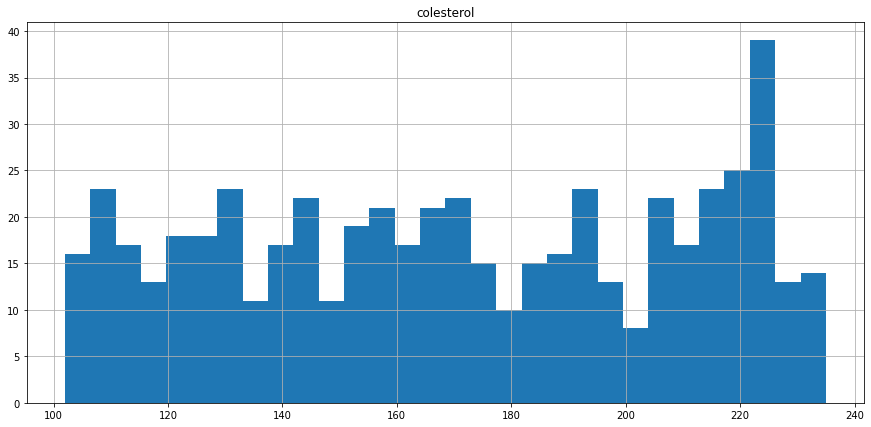

In [36]:
clientes.hist(column='colesterol', figsize=(15,7), bins=30)
plt.show()

In [37]:
clientes

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26
...,...,...,...,...,...
542,543,172.0,207,Masculino,22
543,544,129.0,157,Masculino,1
544,545,107.0,115,Masculino,6
545,546,117.0,147,Masculino,20


In [38]:
# Criando um Identificador para variável genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [39]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0716722710>]],
      dtype=object)

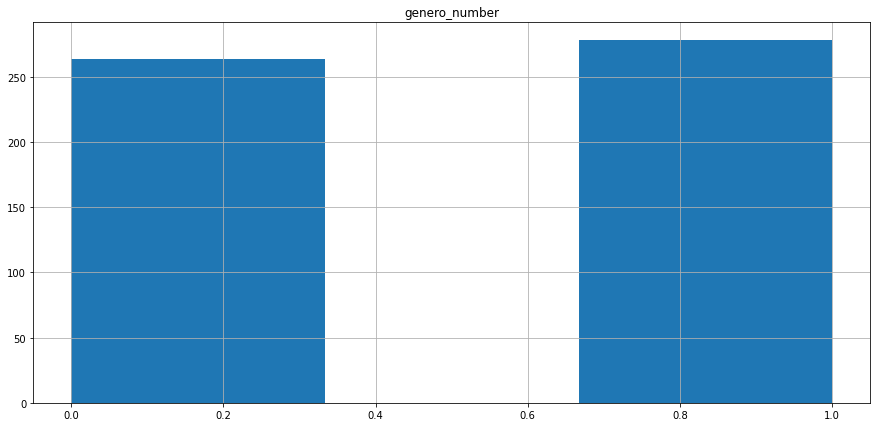

In [40]:
 clientes.hist(column='genero_number', figsize=(15,7), bins=3)

### Junção entre os Dados coletados
Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta

In [41]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [42]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [43]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [44]:
# Realiza Junção entre clintes e idades
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [45]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [46]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


### Organizando a base de Dados

Podemos realizar várias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas. Além, disso, podemos fazer transformações nos textos das linhas e colunas.

In [47]:
# Alterando nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [48]:
# Alteração das linhas da variável sigla_estado
base_completa.sigla_estado.str.upper()

0      RR
17     DF
39     AM
64     SE
83     ES
       ..
418    RO
430    AC
155    CE
372    RN
100    ES
Name: sigla_estado, Length: 498, dtype: object

In [49]:
# Inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [50]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


### Alterando disposição das colunas do arquivo de Dados

Vamos alterar as disposições das colunas no nosso conjunto de dados e afim de facilitar a visualização.

In [51]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
17,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
39,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
64,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
83,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
430,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
155,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
372,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [52]:
base_completa = base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']].reset_index(drop=True)

In [53]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


### Análise de Dados

É a etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior

Para esse momento, vamos realizar um agrupamento de pessoas baseada no peso e colesterol das pessoas.

In [54]:
from sklearn.cluster import KMeans

In [55]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1, 11):
      kmeans = KMeans(n_clusters = k, random_state=0)
      kmeans.fit(X=dados_cliente)
      wcss.append(kmeans.inertia_)
    return wcss

In [56]:
dados_cliente = base_completa[['peso', 'colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227


In [57]:
wcss_clientes = calcular_wcss(dados_cliente)

In [58]:
# Visulizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de: 1248240.6686746986
O cluster 1 possui valor de WCSS de: 298932.7377352369
O cluster 2 possui valor de WCSS de: 127842.60787249672
O cluster 3 possui valor de WCSS de: 73809.93553059456
O cluster 4 possui valor de WCSS de: 49068.8738718445
O cluster 5 possui valor de WCSS de: 34064.50002100837
O cluster 6 possui valor de WCSS de: 25079.92393550797
O cluster 7 possui valor de WCSS de: 20378.05126656164
O cluster 8 possui valor de WCSS de: 16003.657266380145
O cluster 9 possui valor de WCSS de: 13385.38391038145


### Visualizando o Gráfico do Cotovelo

In [59]:
import plotly.express as px # Criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go # Para criação e concatenazação de gráficos

In [60]:
grafico_wcss = px.line (
    x= range(1,11),
    y=wcss_clientes
)

fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title='Número de clusters',
                  yaxis_title='Valor do Wcss',
                  template='plotly_white'
                  )

fig.show()

In [61]:
kmens_clientes = KMeans(n_clusters=3, random_state=0)
base_completa['cluster'] = kmens_clientes.fit_predict(dados_cliente)

In [62]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0
...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,2
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,1
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1


### Calculando os centroídes de cada cluster

In [63]:
centroides_clusters = kmens_clientes.cluster_centers_
centroides_clusters

array([[182.25316456, 217.0443038 ],
       [110.26589595, 125.6300578 ],
       [141.76646707, 172.89221557]])

In [64]:
dados_cliente

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227
...,...,...
493,172.0,207
494,129.0,157
495,107.0,115
496,117.0,147


Aqui temos os centroídes dos 3 cluster de acordo com os atribuitos. Nesse exemplo vemos os centróudes de 'peso' e 'colesterol' respectivamente

In [65]:
grafico = px.scatter(x = base_completa['peso'],
                     y = base_completa['colesterol'],
                     color = base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size= [7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

### Visualizando e alterando layout do gráfico

In [66]:
grafico = px.scatter(x = base_completa['colesterol'],
                     y = base_completa['peso'],
                     color = base_completa['cluster'])

fig = go.Figure(grafico)

fig.update_layout(title = 'Análise de Cluster',
                  xaxis_title = 'Colesterol',
                  yaxis_title = 'Peso')

fig.show()

### Criação da Função para gerar gráficos

In [67]:
def plotar_grafico(x,y, x_label, y_label):
  grafico = px.scatter(x = x,
                       y = y,
                       color = base_completa['cluster'])
  
  fig = go.Figure(grafico)

  fig.update_layout(title='Análise de Clusters',
                    xaxis_title = x_label,
                    yaxis_title = y_label)
  
  fig.show()

In [68]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [69]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [70]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

### Segmentando os clientes baseado na análise dos clusters

Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento. Vamos agrupar em 3 tipos:

1. Alto risco: Peso e colesterol altos
2. Baixo risco: Peso e colesterol baixos
3. Moderado risco: Peso e colesterol medianos

In [71]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x,y)

In [72]:
cluster_clientes = base_completa

In [73]:
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Risco Moderado'
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Alto Risco'

In [74]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1,Baixo Risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2,Risco Moderado
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0,Alto Risco
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,2,Risco Moderado
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,1,Baixo Risco
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,Baixo Risco


### Análise dos clusters criados

In [75]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,158.0,43.126582,15.172358,16.0,32.0,43.0,56.0,69.0
Baixo Risco,173.0,43.543353,15.010641,17.0,31.0,42.0,57.0,70.0
Risco Moderado,167.0,41.946108,15.069421,16.0,29.0,42.0,53.5,70.0


In [76]:
# Verifica os valores de estados por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,158,25,Rio Grande do Sul,10
Baixo Risco,173,25,Amazonas,13
Risco Moderado,167,25,Mato Grosso do Sul,12


In [77]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Mato Grosso"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
103,112,Masculino,66,179.0,214,11,Mato Grosso,MT,Brasil,0,Alto Risco
142,155,Masculino,16,167.0,204,11,Mato Grosso,MT,Brasil,0,Alto Risco
146,160,Masculino,23,171.0,212,11,Mato Grosso,MT,Brasil,0,Alto Risco
151,168,Masculino,34,184.0,222,11,Mato Grosso,MT,Brasil,0,Alto Risco
155,172,Feminino,61,161.0,201,11,Mato Grosso,MT,Brasil,0,Alto Risco
178,198,Masculino,28,173.0,211,11,Mato Grosso,MT,Brasil,0,Alto Risco
204,227,Masculino,35,184.0,220,11,Mato Grosso,MT,Brasil,0,Alto Risco
223,248,Masculino,28,171.0,204,11,Mato Grosso,MT,Brasil,0,Alto Risco
329,361,Feminino,34,180.0,218,11,Mato Grosso,MT,Brasil,0,Alto Risco
470,518,Feminino,19,172.0,210,11,Mato Grosso,MT,Brasil,0,Alto Risco


In [78]:
cluster_clientes.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,158.0,217.044304,9.629007,196.0,211.0,219.0,224.0,235.0
Baixo Risco,173.0,125.630058,13.799293,102.0,113.0,127.0,138.0,151.0
Risco Moderado,167.0,172.892216,13.774881,150.0,161.5,171.0,185.0,198.0


In [79]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min     25%    50%  \
nome_cluster   genero                                                          
Alto Risco     Feminino    67.0  183.656716  10.303798  158.0  178.50  185.0   
               Masculino   91.0  181.219780  11.748099  159.0  171.50  180.0   
Baixo Risco    Feminino    75.0  111.133333   7.788303   96.0  107.00  112.0   
               Masculino   98.0  109.602041   8.264618   95.0  103.00  108.0   
Risco Moderado Feminino    98.0  142.132653  10.617664  124.0  133.25  141.0   
               Masculino   69.0  141.246377  10.287636  124.0  132.00  145.0   

                            75%    max  
nome_cluster   genero                   
Alto Risco     Feminino   191.0  203.0  
               Masculino  188.0  203.0  
Baixo Risco    Feminino   116.5  126.0  
               Masculino  117.0  126.0  
Risco Moderado Feminino   153.0  159.0  
               Masculino  150.0  157.0

### Exportando Dados

In [80]:
cluster_clientes.to_csv('classificacao_clientes.csv', sep = ';', encoding='latin1')